In [33]:
import prophet

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on colab


In [34]:
# Import the plotting library
import matplotlib.pyplot as plt
import yfinance as yf  
import pandas as pd

df = pd.read_csv('dataset_social_technical_1d_v2.csv')
# Plot the close price of the Stock prices
fig = px.line(x = df['close_1'].index, 
              y = df['close_1'])
fig.show()


In [35]:
from prophet import Prophet

model = Prophet()
p_df = pd.DataFrame({ "ds": df.index, "y": df["close_1"]}).reset_index(drop=True)


In [36]:
p_df['ds'] = df['date']

In [37]:
p_df.head()

,ds,y
0,2018-01-02,66.199997
1,2018-01-03,66.680000
2,2018-01-04,67.379997
3,2018-01-05,68.120003
4,2018-01-08,69.860001


In [38]:

model.fit(p_df)

07:13:22 - cmdstanpy - INFO - Chain [1] start processing
07:13:22 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future = model.make_future_dataframe(periods=100)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1006,2022-11-02
1007,2022-11-03
1008,2022-11-04
1009,2022-11-05


In [40]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1006,2022-11-02,35.291196,24.613202,35.038015,32.784496,38.273597,-5.606454,-5.606454,-5.606454,-0.666845,-0.666845,-0.666845,-4.939609,-4.939609,-4.939609,0.0,0.0,0.0,29.684742
1007,2022-11-03,35.250839,24.796682,34.811074,32.672559,38.315791,-5.546199,-5.546199,-5.546199,-0.517956,-0.517956,-0.517956,-5.028243,-5.028243,-5.028243,0.0,0.0,0.0,29.704640
1008,2022-11-04,35.210482,24.524374,34.913147,32.601473,38.315783,-5.807353,-5.807353,-5.807353,-0.695948,-0.695948,-0.695948,-5.111406,-5.111406,-5.111406,0.0,0.0,0.0,29.403129
1009,2022-11-05,35.170125,25.927487,36.730220,32.505964,38.333954,-3.572098,-3.572098,-3.572098,1.616375,1.616375,1.616375,-5.188473,-5.188473,-5.188473,0.0,0.0,0.0,31.598027
1010,2022-11-06,35.129768,26.355504,37.292041,32.397494,38.364329,-3.642429,-3.642429,-3.642429,1.616376,1.616376,1.616376,-5.258804,-5.258804,-5.258804,0.0,0.0,0.0,31.487340


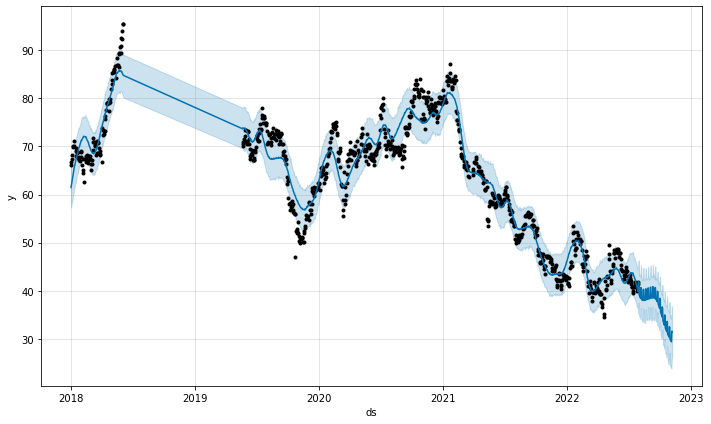

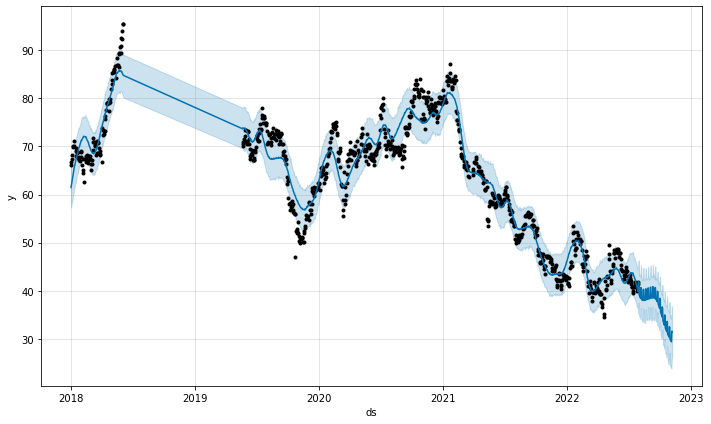

In [15]:
model.plot(forecast)

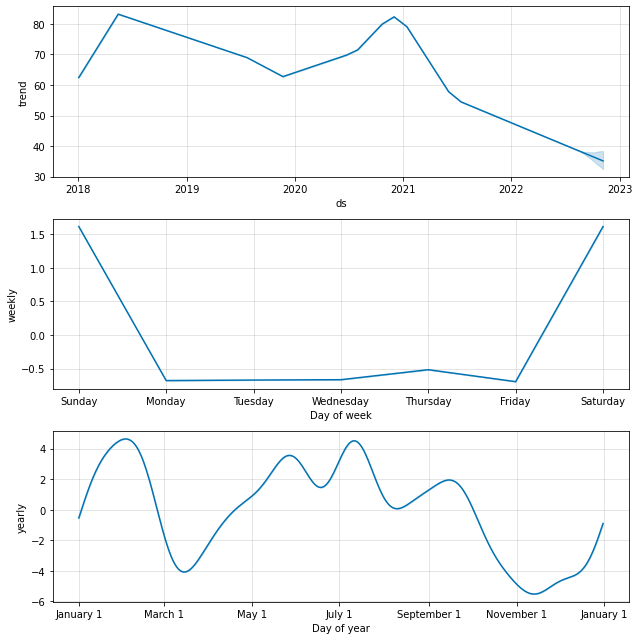

In [41]:
fig2 = model.plot_components(forecast)

In [42]:
model = Prophet()
model.add_country_holidays(country_name='FR')
model.fit(p_df)

07:13:42 - cmdstanpy - INFO - Chain [1] start processing
07:13:42 - cmdstanpy - INFO - Chain [1] done processing


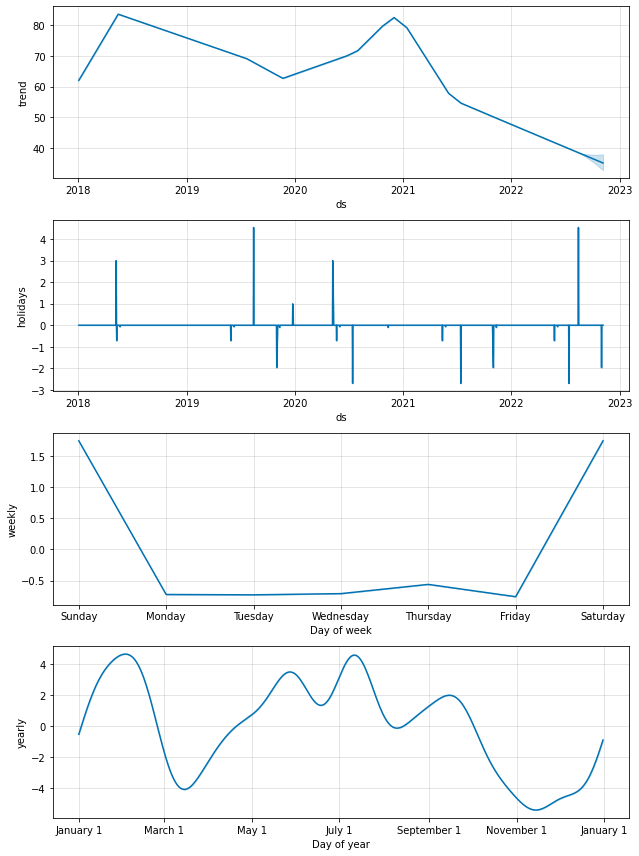

In [43]:
forecast = model.predict(future)
fig = model.plot_components(forecast)

In [44]:
model = Prophet()
model.add_regressor('close_1')

In [58]:
train_size = int(0.8 * len(df))
p_df = df[['date', 'SMA_15', 'Stochastic_15', 'Stochastic_Ratio', 'price_pct_variation', 'volume', 'title_vader_compound', 'close_1']]
p_df.columns = ['ds', 'SMA_15', 'Stochastic_15', 'Stochastic_Ratio', 'price_pct_variation', 'volume', 'title_vader_compound', 'y']
p_df.head()


,ds,SMA_15,Stochastic_15,Stochastic_Ratio,price_pct_variation,volume,title_vader_compound,y
0,2018-01-02,64.484667,49.213487,1.075724,0.405367,219072,0.20095,66.199997
1,2018-01-03,64.465334,94.326116,1.055682,2.795024,256706,-0.61240,66.680000
2,2018-01-04,64.615334,81.718468,0.969574,0.725081,306794,0.22870,67.379997
3,2018-01-05,64.908667,94.515485,0.931893,1.049785,176037,-0.03848,68.120003
4,2018-01-08,65.239334,93.453452,1.123474,1.098257,271314,-0.30270,69.860001


In [59]:
p_df = p_df.rename(columns = {"date": "ds"})
X_train = p_df.iloc[:train_size, :]
X_test = p_df.iloc[train_size:, :]

X_train.head()

,ds,SMA_15,Stochastic_15,Stochastic_Ratio,price_pct_variation,volume,title_vader_compound,y
0,2018-01-02,64.484667,49.213487,1.075724,0.405367,219072,0.20095,66.199997
1,2018-01-03,64.465334,94.326116,1.055682,2.795024,256706,-0.61240,66.680000
2,2018-01-04,64.615334,81.718468,0.969574,0.725081,306794,0.22870,67.379997
3,2018-01-05,64.908667,94.515485,0.931893,1.049785,176037,-0.03848,68.120003
4,2018-01-08,65.239334,93.453452,1.123474,1.098257,271314,-0.30270,69.860001


In [60]:
model = Prophet()
model.add_regressor('SMA_15')
model.add_regressor('Stochastic_15')
model.add_regressor('Stochastic_Ratio')
model.add_regressor('price_pct_variation')
model.add_regressor('volume')
model.add_regressor('title_vader_compound')


In [61]:
X_train

,ds,SMA_15,Stochastic_15,Stochastic_Ratio,price_pct_variation,volume,title_vader_compound,y
0,2018-01-02,64.484667,49.213487,1.075724,0.405367,219072,0.200950,66.199997
1,2018-01-03,64.465334,94.326116,1.055682,2.795024,256706,-0.612400,66.680000
2,2018-01-04,64.615334,81.718468,0.969574,0.725081,306794,0.228700,67.379997
3,2018-01-05,64.908667,94.515485,0.931893,1.049785,176037,-0.038480,68.120003
4,2018-01-08,65.239334,93.453452,1.123474,1.098257,271314,-0.302700,69.860001
...,...,...,...,...,...,...,...,...
723,2021-11-08,46.296000,65.901054,1.561376,-0.063422,377660,-0.036893,47.000000
724,2021-11-09,46.351333,61.130728,1.474696,-0.571188,442059,0.152047,47.090000
725,2021-11-10,46.350667,62.720836,1.490679,0.191490,316892,0.183536,47.049999
726,2021-11-11,46.306000,62.014106,1.514840,-0.084946,327106,-0.122718,45.980000


In [62]:
model.fit(X_train)

08:32:27 - cmdstanpy - INFO - Chain [1] start processing
08:32:28 - cmdstanpy - INFO - Chain [1] done processing


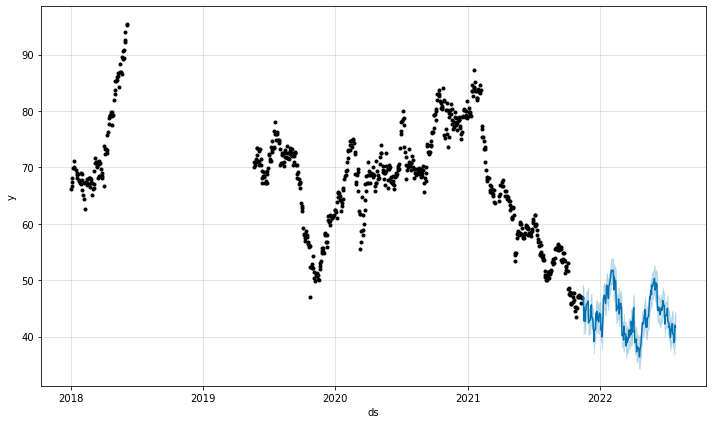

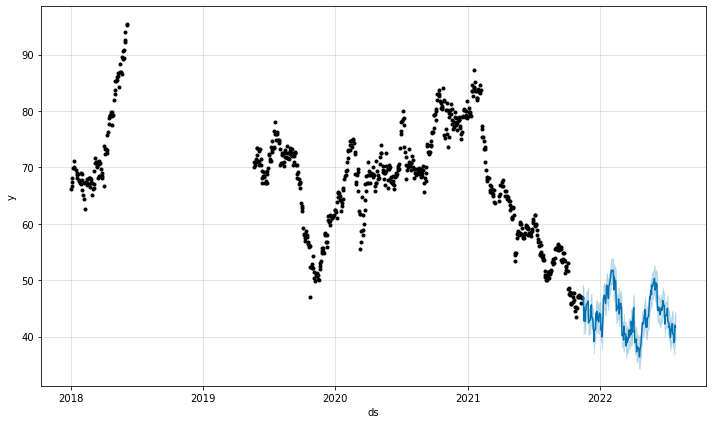

In [63]:
forecast = model.predict(X_test)
model.plot(forecast)

In [64]:
future = model.make_future_dataframe(periods=1)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
724,2021-11-09
725,2021-11-10
726,2021-11-11
727,2021-11-12


In [65]:
fig = px.scatter(p_df, x = "ds", y = "y")
fig.add_trace(px.line(forecast, x="ds", y="yhat").data[0])
fig['data'][1]['line']['color']="#4BE8E0"
fig.show()

In [66]:
p_df.head()

,ds,SMA_15,Stochastic_15,Stochastic_Ratio,price_pct_variation,volume,title_vader_compound,y
0,2018-01-02,64.484667,49.213487,1.075724,0.405367,219072,0.20095,66.199997
1,2018-01-03,64.465334,94.326116,1.055682,2.795024,256706,-0.61240,66.680000
2,2018-01-04,64.615334,81.718468,0.969574,0.725081,306794,0.22870,67.379997
3,2018-01-05,64.908667,94.515485,0.931893,1.049785,176037,-0.03848,68.120003
4,2018-01-08,65.239334,93.453452,1.123474,1.098257,271314,-0.30270,69.860001


In [ ]:
# df_merge = pd.merge(p_df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
# df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
# df_merge.head()


In [67]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')


  0%|          | 0/2 [00:00<?, ?it/s]

08:32:51 - cmdstanpy - INFO - Chain [1] start processing
08:32:51 - cmdstanpy - INFO - Chain [1] done processing
08:32:53 - cmdstanpy - INFO - Chain [1] start processing
08:32:53 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
# Python
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-18,68.726931,66.685591,70.707425,66.940002,2020-05-16
1,2020-05-19,68.365125,66.193084,70.493238,69.000000,2020-05-16
2,2020-05-20,70.275325,68.021754,72.504103,69.400002,2020-05-16
3,2020-05-21,70.678561,68.546401,72.815853,70.300003,2020-05-16
4,2020-05-22,71.581670,69.346892,73.755124,72.519997,2020-05-16


In [69]:
# Python
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,34 days,6.236461,2.497291,2.099074,0.028756,0.027148,0.028201,0.530612
1,35 days,6.320776,2.514115,2.128295,0.029129,0.027352,0.028581,0.510204
2,36 days,6.260117,2.502023,2.101417,0.028705,0.027352,0.028164,0.510204
3,37 days,6.292571,2.508500,2.117274,0.028932,0.027352,0.028386,0.510204
4,38 days,6.366212,2.523135,2.141993,0.029301,0.029451,0.028747,0.510204


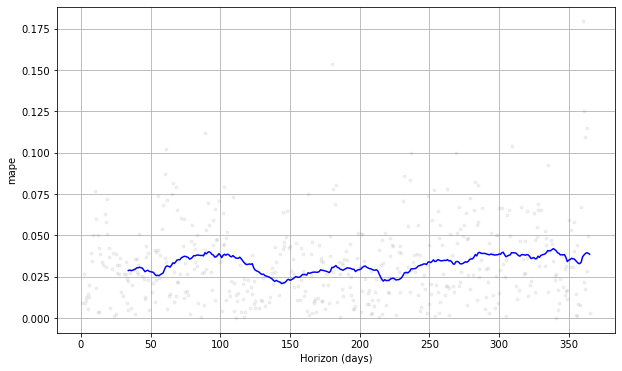

In [70]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
